In [32]:
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import torch
from ultralytics import YOLO
import numpy as np 

In [1]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [2]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install dependencies

In [4]:
!pip install -q ultralytics roboflow

## Imports

In [5]:
from roboflow import Roboflow
from IPython.display import Image

## Pull dataset

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
rf = Roboflow(api_key='U2PLBpH7rFRysjU7AG7B')
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(10)
dataset = version.download("yolov8")

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-10 in yolov8:: 100%|██████████| 636/636 [00:00<00:00, 2957.80it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [7]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [11]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=5 epochs=50 imgsz=1280 plots=True

/kaggle/working
100%|█████████████████████████████████████████| 131M/131M [00:00<00:00, 337MB/s]
Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/datasets/football-players-detection-10/data.yaml, epochs=50, time=None, patience=100, batch=5, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

## Load model 

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
player_detection_model = YOLO('/kaggle/input/playerdetection/pytorch/default/1/best.pt').to(device=device)

In [10]:
dataset_path = "/kaggle/working/datasets/football-players-detection-10/test/images"  
test_images = glob(os.path.join(dataset_path, "*.jpg")) 
# for image_path in test_images:
#     results = player_detection_model(image_path, imgsz=1280, verbose=False)

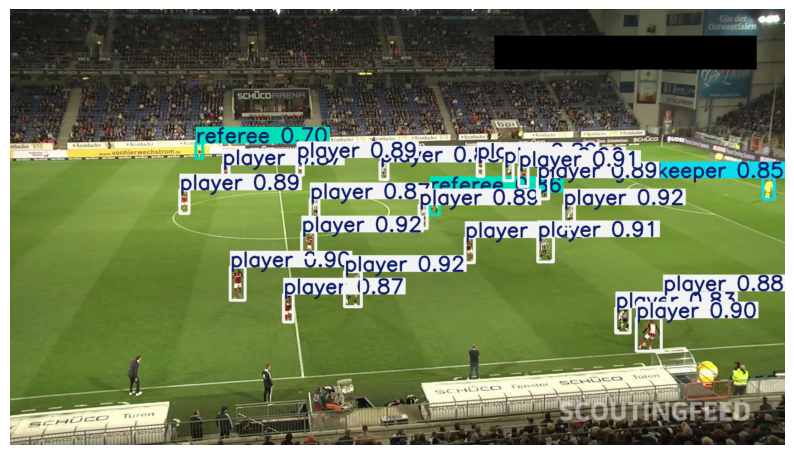

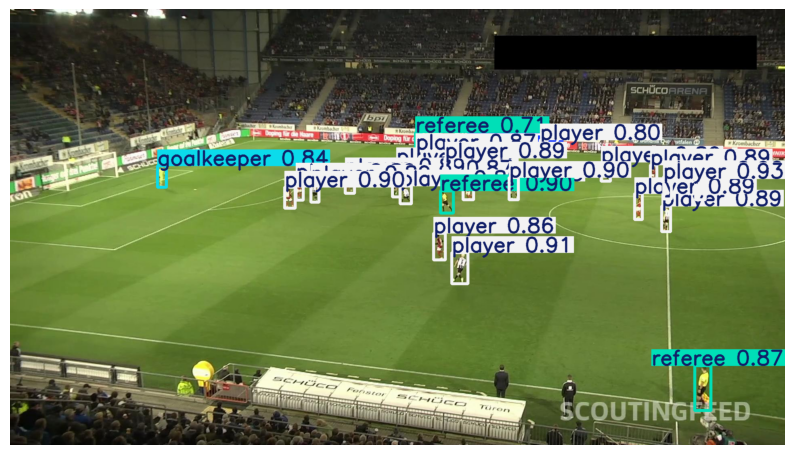

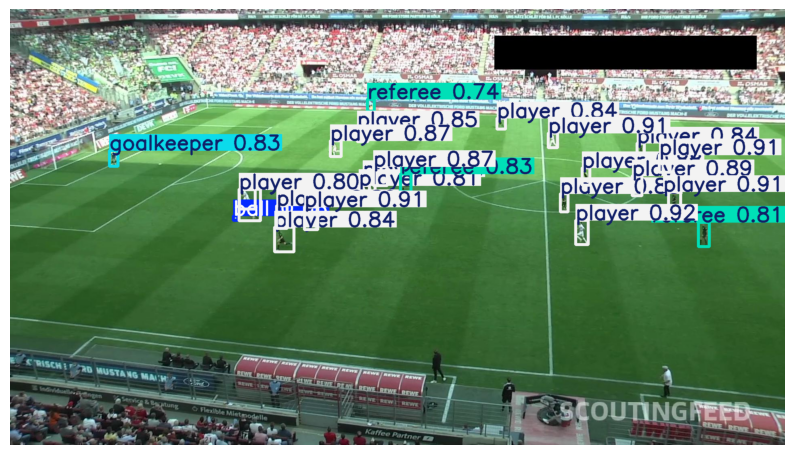

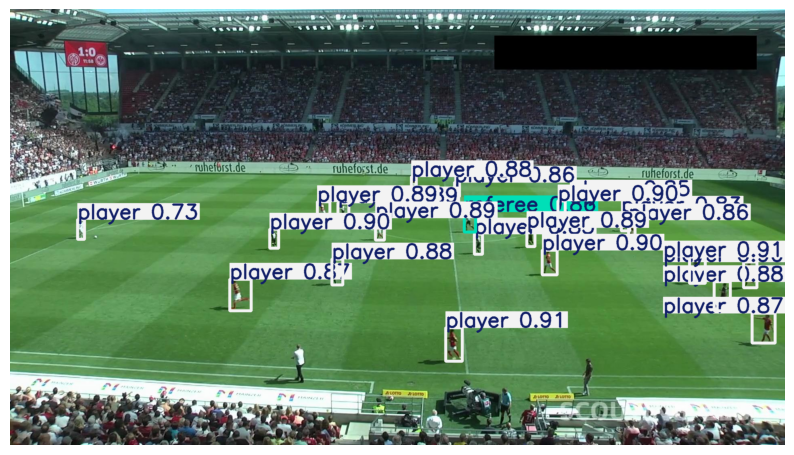

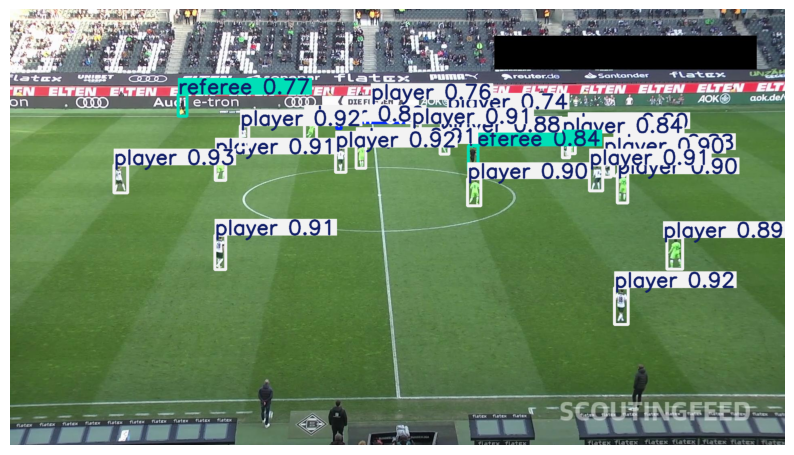

In [11]:
for image_path in test_images[:5]: 
    results = player_detection_model(image_path, imgsz=1280, verbose=False)
    annotated_image = results[0].plot()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

--2024-11-21 10:09:14--  https://lareclame.fr/wp-content/uploads/2016/05/topinvisiballs.jpg
Resolving lareclame.fr (lareclame.fr)... 172.67.73.23, 104.26.4.66, 104.26.5.66, ...
Connecting to lareclame.fr (lareclame.fr)|172.67.73.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130074 (127K) [image/jpeg]
Saving to: '/kaggle/working/test_image.jpg'

/kaggle/working/tes 100%[===================>] 127.03K   582KB/s    in 0.2s    

2024-11-21 10:09:15 (582 KB/s) - '/kaggle/working/test_image.jpg' saved [130074/130074]



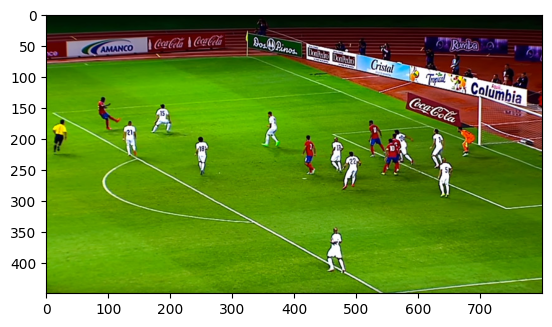

In [26]:
import matplotlib.image as mpimg
!wget -O /kaggle/working/test_image.jpg https://lareclame.fr/wp-content/uploads/2016/05/topinvisiballs.jpg
test_img_path='/kaggle/working/test_image.jpg'
img = mpimg.imread(test_img_path)
plt.imshow(img)

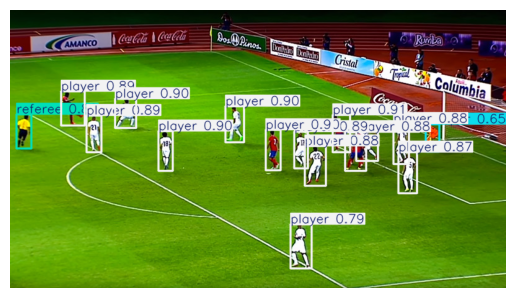

In [28]:
result = player_detection_model(test_img_path, imgsz=1280, verbose=False)
plt.imshow(cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [35]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}
 obb: None
 orig_img: array([[[ 16,  32,  14],
         [  5,  21,   3],
         [  0,  16,   0],
         ...,
         [  2,   1,   3],
         [  2,   1,   3],
         [  2,   1,   3]],
 
        [[ 12,  28,  10],
         [  3,  19,   1],
         [  0,  16,   0],
         ...,
         [  2,   2,   2],
         [  2,   2,   2],
         [  2,   2,   2]],
 
        [[  4,  23,   4],
         [  0,  19,   0],
         [  0,  19,   0],
         ...,
         [  2,   2,   2],
         [  2,   2,   2],
         [  2,   2,   2]],
 
        ...,
 
        [[  4, 128,  84],
         [  2, 126,  82],
         [  1, 125,  81],
         ...,
         [  1, 116,  72],
         [  0, 115,  71],
         [  0, 115,  71]],
 
        [[  6, 127,  83],
         [  3, 124,  80],
         [  0, 1

In [12]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch2000.jpg
R_curve.png					  train_batch2001.jpg
args.yaml					  train_batch2002.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1732129413.d5cee9d9c090.96.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


/kaggle/working


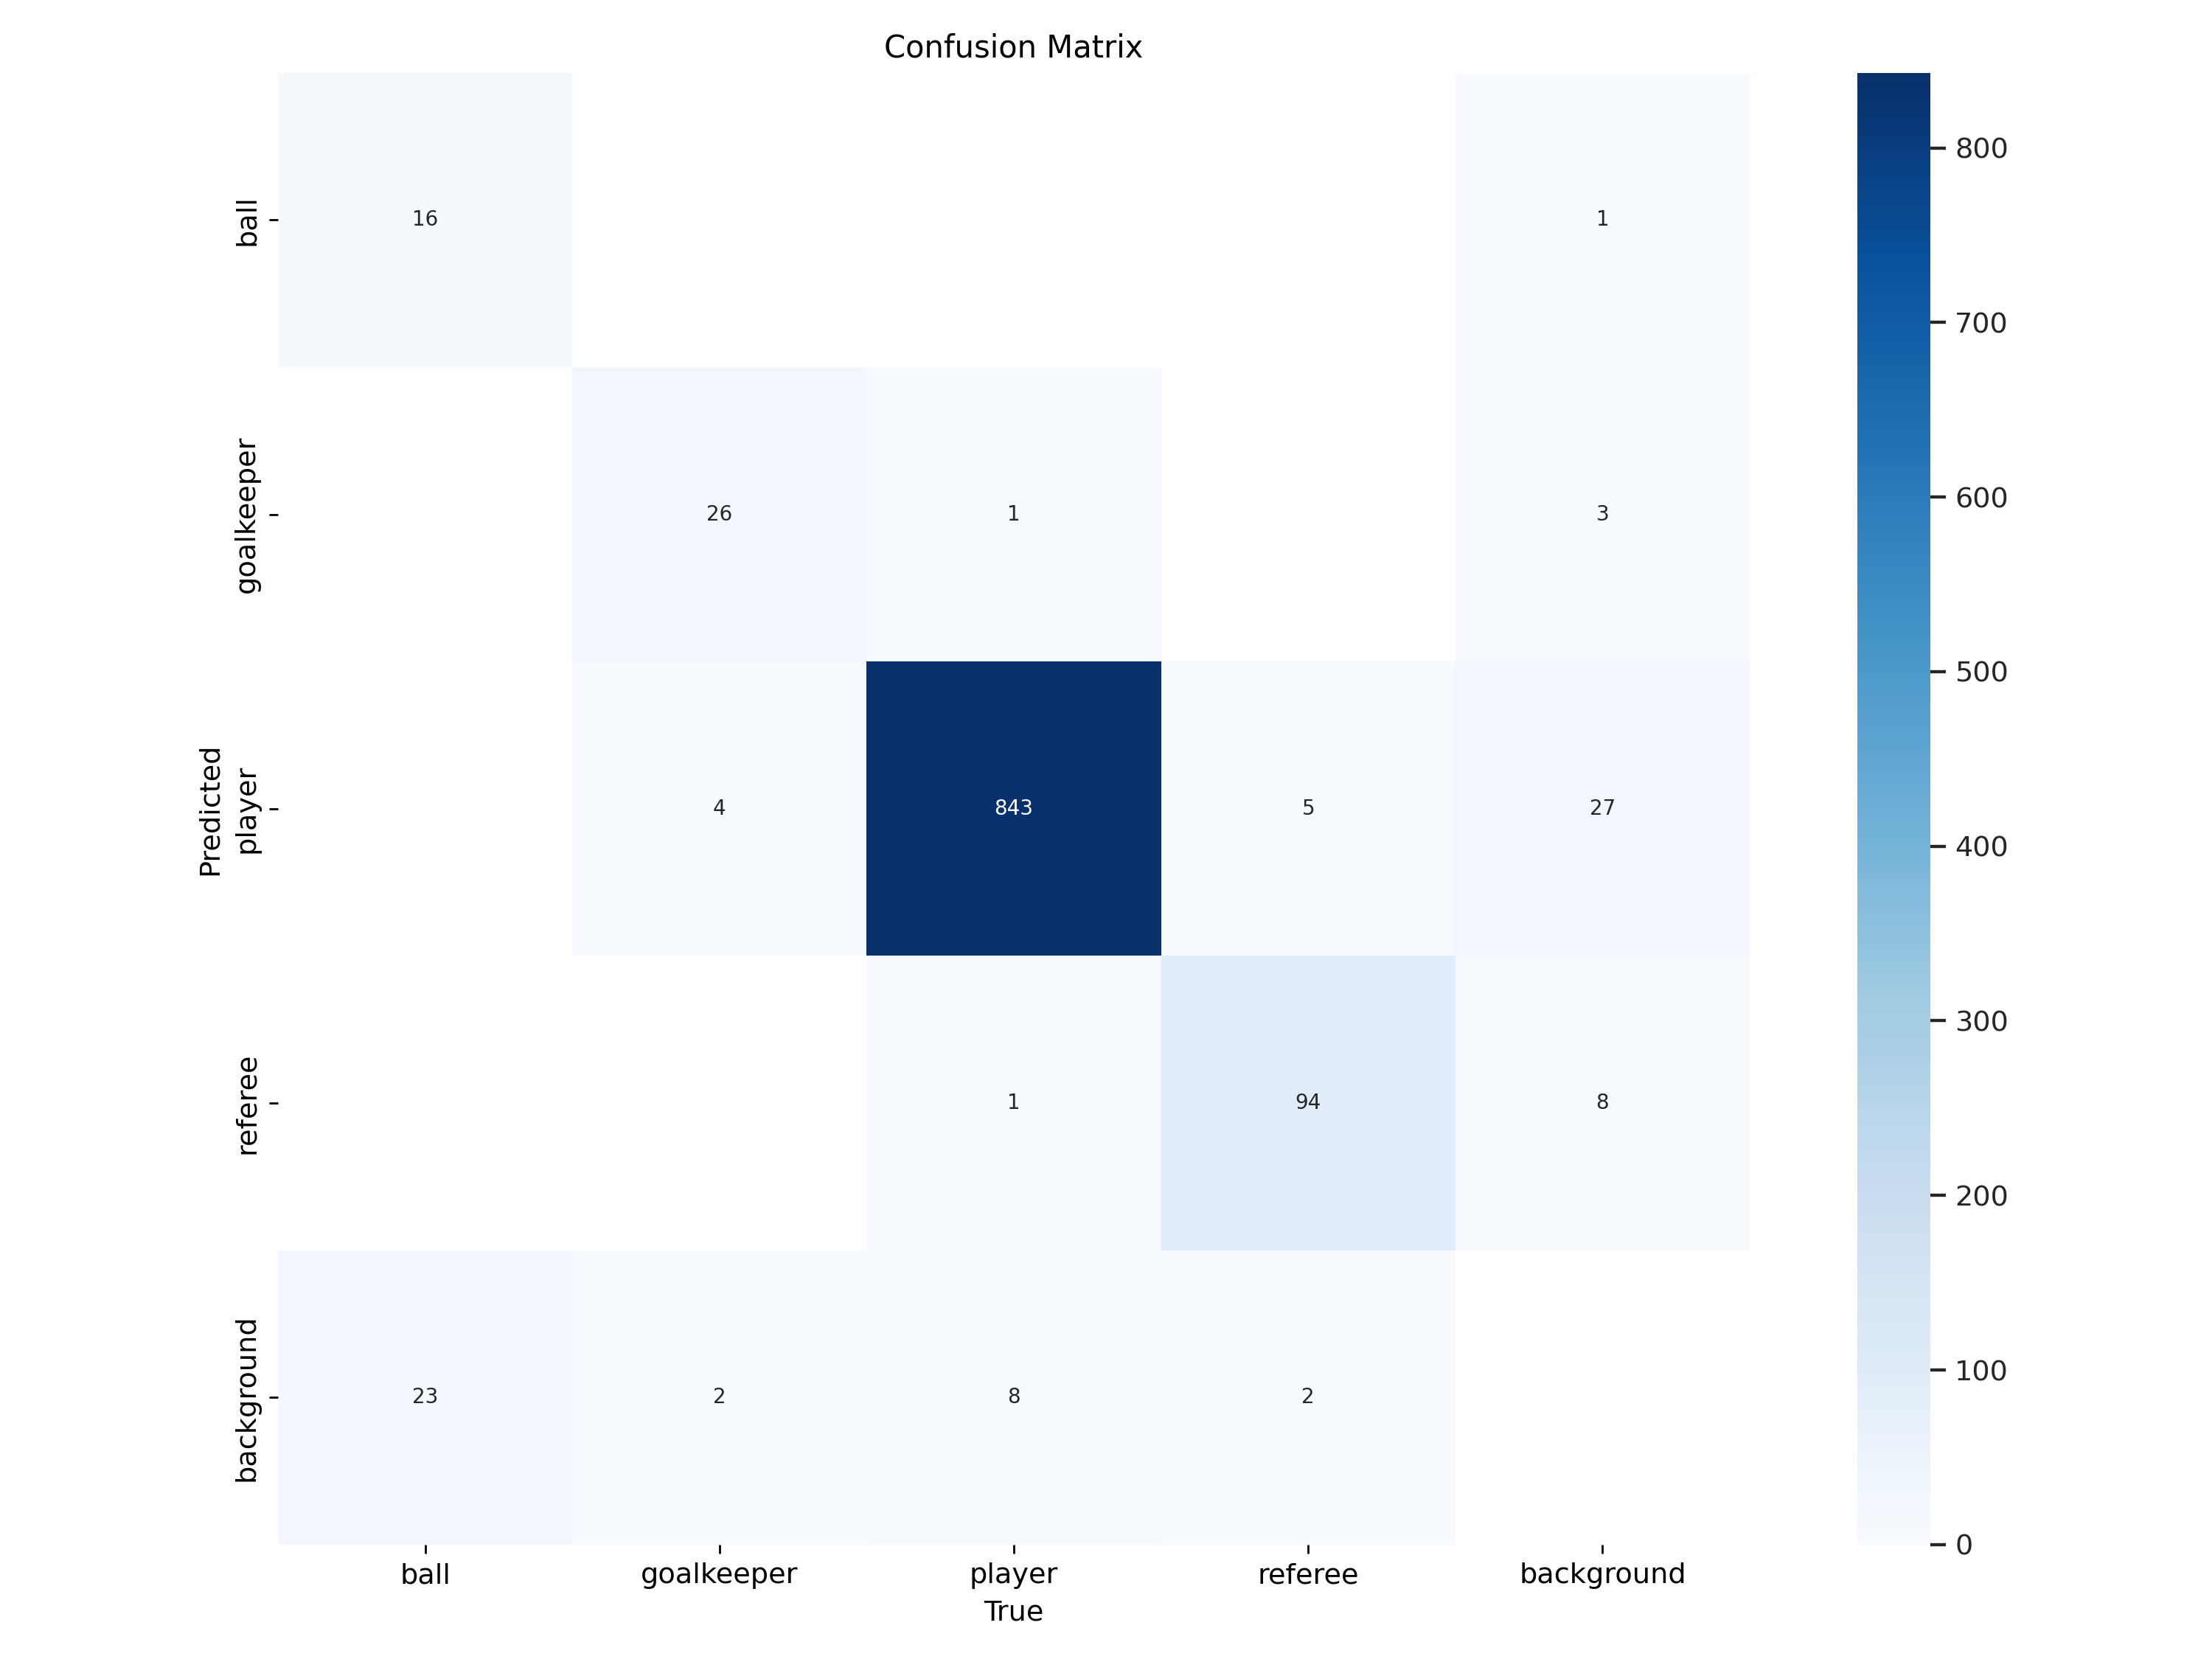

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


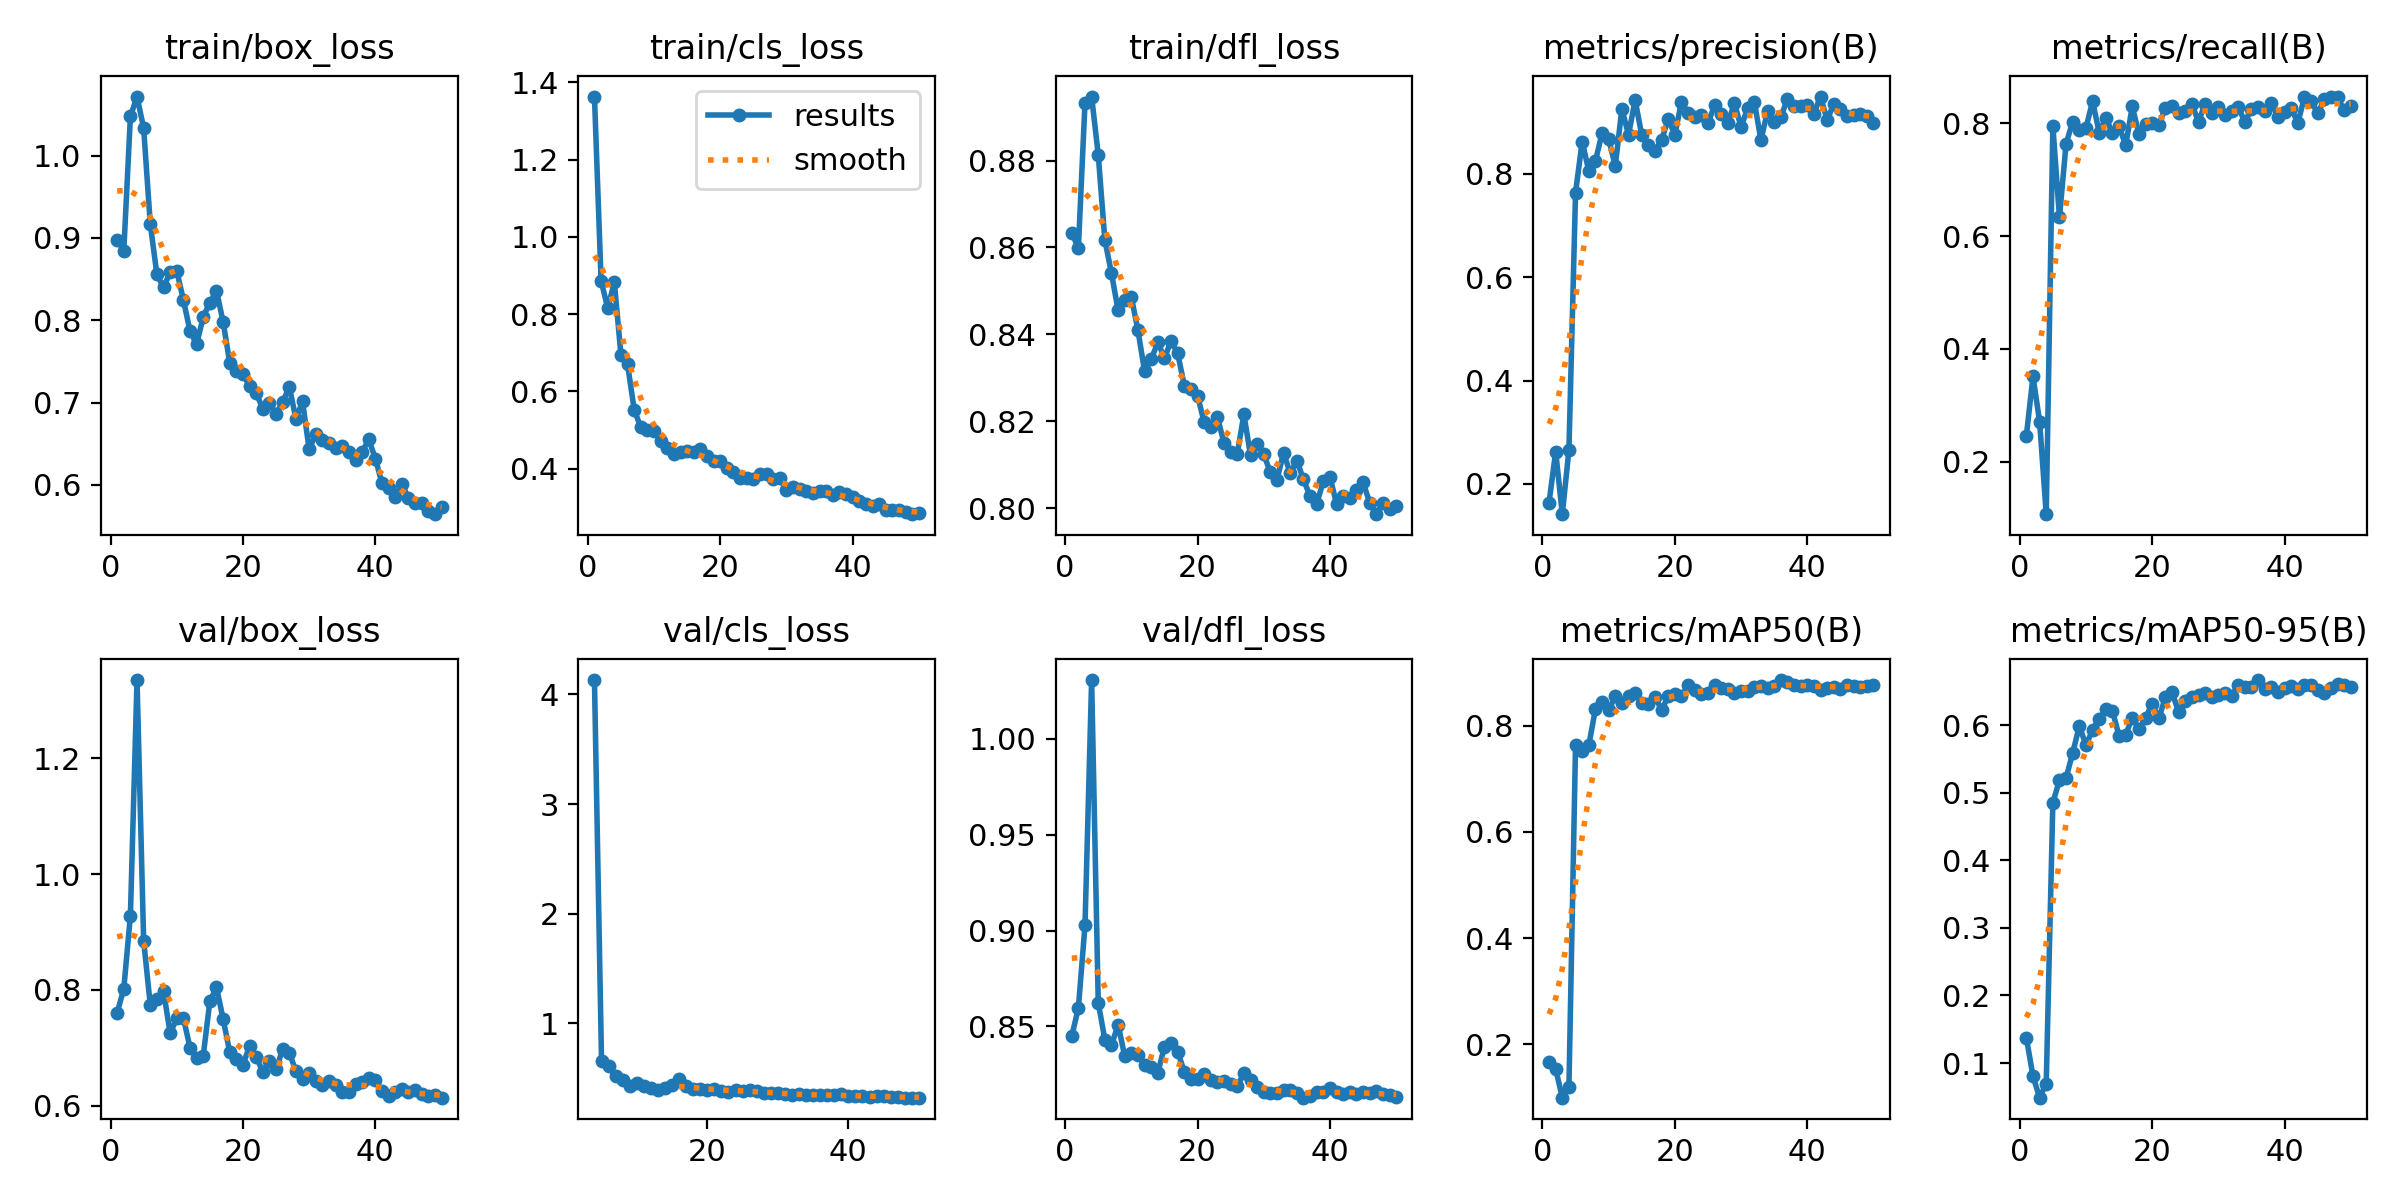

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


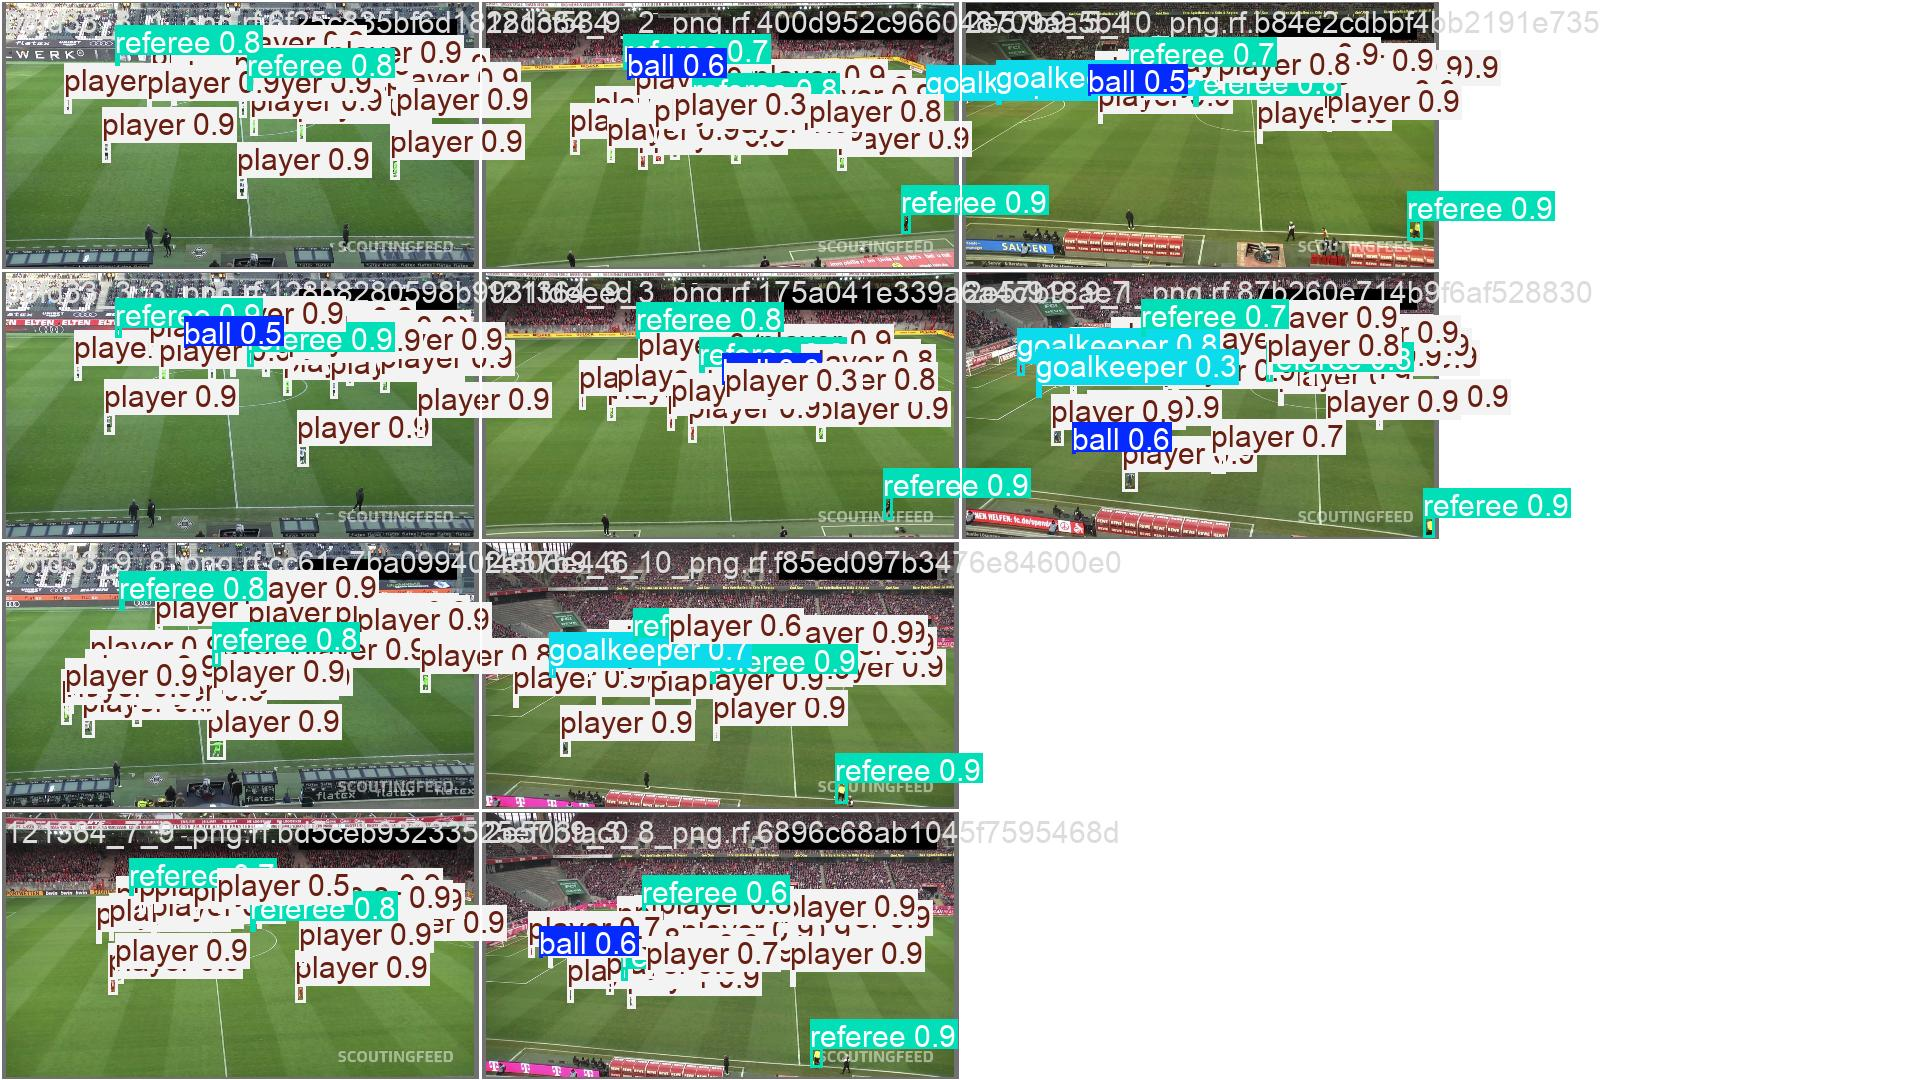

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate custom model

In [18]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/kaggle/working
Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /kaggle/working/datasets/football-players-detection-10/valid/label
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         43       1025      0.911      0.828      0.885      0.679
                  ball         39         39      0.876      0.487      0.618       0.34
            goalkeeper         32         32      0.883      0.875      0.952      0.763
                player         43        853      0.953      0.989      0.994      0.864
               referee         43        101      0.933       0.96      0.974      0.749
Speed: 10.0ms preprocess, 157.2ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Deploy model on Roboflow

In [20]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.34, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/10/uploadModel?api_key=U2PLBpH7rFRysjU7AG7B&modelType=yolov8&nocache=true
